# Life Expectancy and GDP: A Visual Overview

## Scope of the Project

### Goals
* Is life expectancy/GDP increasing over the years?
* Do the percent changes in life expectancy/GDP follow any particular distribution?
* We can expect that the global financial crisis of 2008 had an effect on the countries GDP. Did the crisis induce any effects on the life expectancy/GDP on any of the countries?
* How does life expectancy depend on GDP for each Country?

## Imports

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from cycler import cycler
sns.set()

## Data

### Imports and Adjustments

In [17]:
data = pd.read_csv('all_data.csv')

# Normalize GDP to order 10bn
data['GDP_bnnorm'] = data['GDP'].map(lambda x: x/(10**10))
# Handle the large orders of magnitude with log
data['log_GDP'] = data['GDP'].map(lambda x: np.log10(x))

# Simplify name of Life expectancy column
data.rename(columns={'Life expectancy at birth (years)':'LEABY'}, inplace=True)

# Percent changes of Life expectancy and GDP over time
data[['LEABY_pct_ch', 'GDP_pct_ch']] = data[['LEABY', 'GDP', 'Country']].groupby('Country').pct_change()

# Simplify name of the United States
data['Country'] = data['Country'].map(lambda x: 'US' if x == 'United States of America' else x)

print(data.head())

  Country  Year  LEABY           GDP  GDP_bnnorm    log_GDP  LEABY_pct_ch  \
0   Chile  2000   77.3  7.786093e+10    7.786093  10.891320           NaN   
1   Chile  2001   77.3  7.097992e+10    7.097992  10.851136      0.000000   
2   Chile  2002   77.8  6.973681e+10    6.973681  10.843462      0.006468   
3   Chile  2003   77.9  7.564346e+10    7.564346  10.878771      0.001285   
4   Chile  2004   78.0  9.921039e+10    9.921039  10.996557      0.001284   

   GDP_pct_ch  
0         NaN  
1   -0.088376  
2   -0.017514  
3    0.084699  
4    0.311553  


### Exploration

We start with a quick comparison of the GDP and Life expetancy for each country. Since the data points are distributed over time, it wouldn't be that interesting to simply look at the mean for each numerical variable. Instead, we will look at the percentage changes from year to year to see if we can identify a distribution of these data points. The means of these distributions can then be interpreted as a drift over time. To get an overview, we first look at violin and swarm plots for both the percent change in GDP and life expectancy.

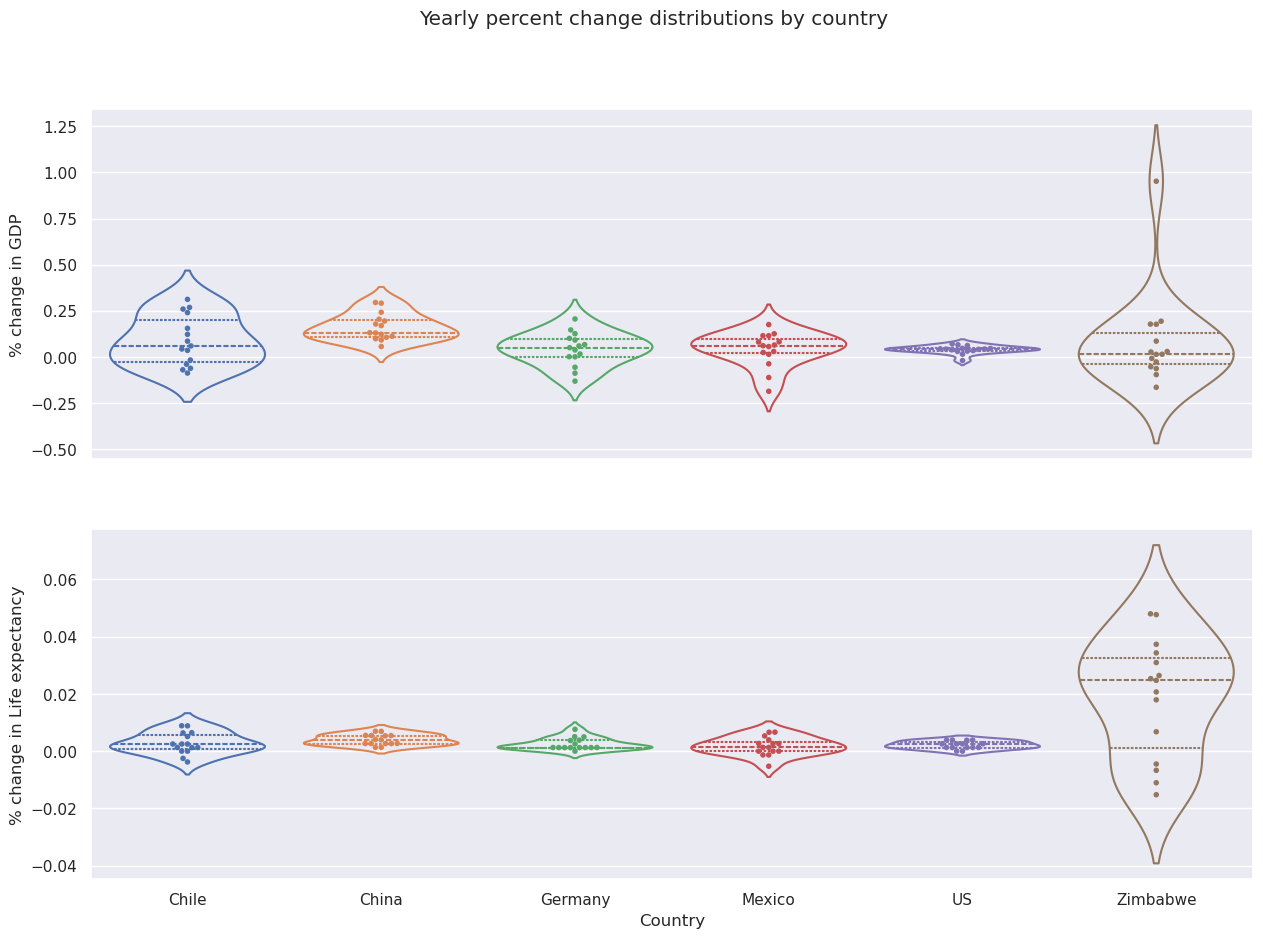

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10), sharex=True, sharey=False)

sns.violinplot(data=data.dropna(), y='GDP_pct_ch', x='Country', hue='Country', density_norm='area', ax=ax[0], inner='quart', fill=False)
sns.swarmplot(data=data.dropna(), y='GDP_pct_ch', x='Country', hue='Country', size=4, ax=ax[0])
sns.violinplot(data=data.dropna(), y='LEABY_pct_ch', x='Country', hue='Country', density_norm='area', ax=ax[1], inner='quart', fill=False)
sns.swarmplot(data=data.dropna(), y='LEABY_pct_ch', x='Country', hue='Country', size=4, ax=ax[1])

fig.suptitle('Yearly percent change distributions by country')

ax[0].set_ylabel('% change in GDP')
ax[1].set_ylabel('% change in Life expectancy')

plt.savefig('./figures/violins')
plt.show()

These plots show the general distributions inferred by the data as well as the actual data points. Since we only have 15 data points we should be careful about drawing any conclusions about the true underlying distributions that generate the data. However, it seems clear that, for both datasets, Zimbabwe is the most volatile. Most years all countries are able to increase GDP with most countries seeing a decrease every few years. It is worth noticing that developed as well as relatively underdeveloped countries experience years of decline.

In the case of change in life expectancy, most countries seem more or less constant in their expected number of years with Zimbabwe again being noticeably more volatile. Next, we will look at the percentage change of these two variables for each year to see if we can gain more insight into the factors generating the data.

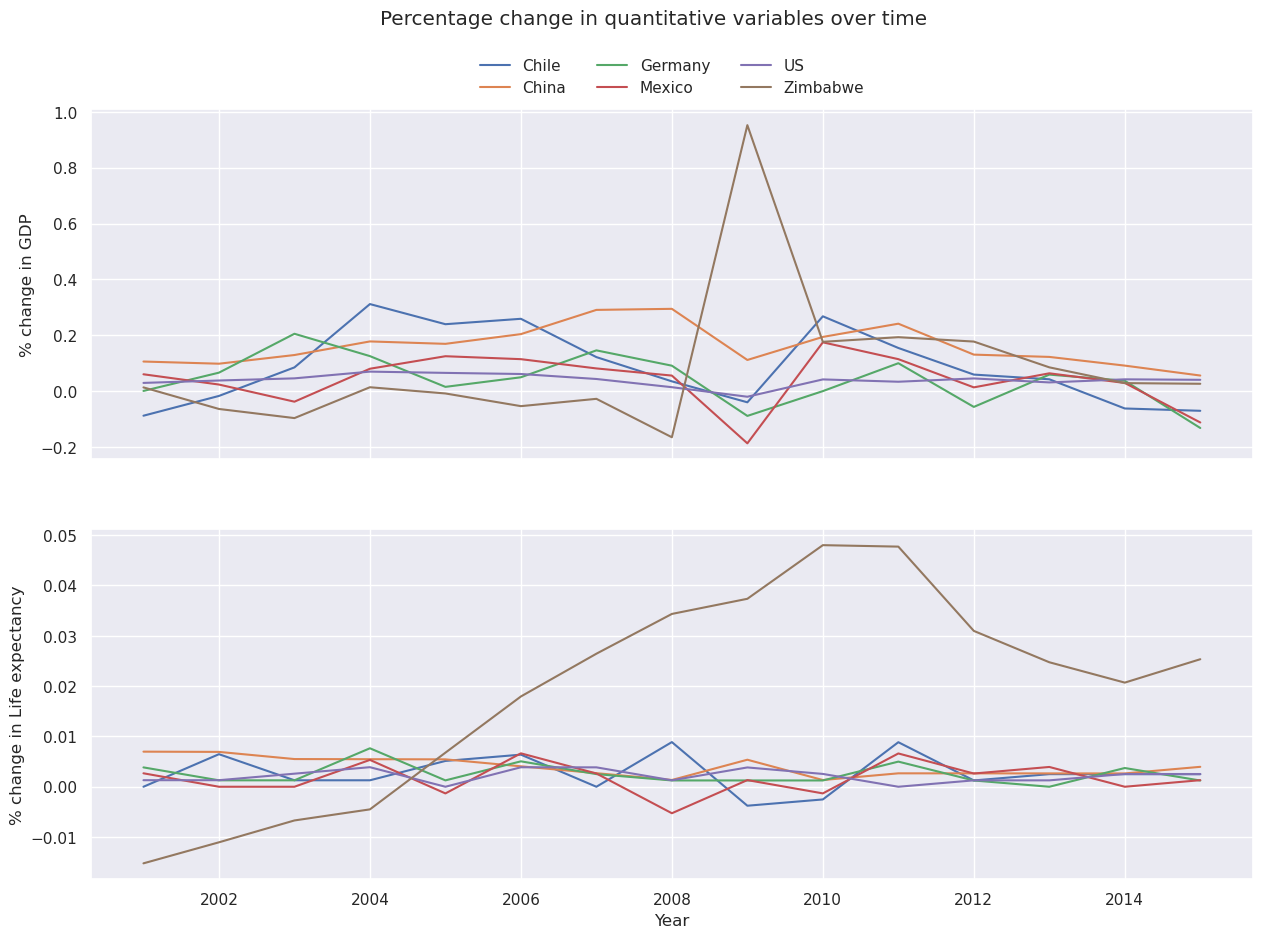

In [19]:
nrows = 2
ncols = 1

fig, ax = plt.subplots(nrows, ncols, figsize=(15,10), sharex=True, sharey=False)

sns.lineplot(data=data, ax=ax[0], x="Year", y="GDP_pct_ch", hue="Country")
sns.move_legend(ax[0], 'lower center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
sns.lineplot(data=data, ax=ax[1], x="Year", y="LEABY_pct_ch", hue='Country', legend=False)

fig.suptitle('Percentage change in quantitative variables over time')

ax[0].set_ylabel('% change in GDP')
ax[1].set_ylabel('% change in Life expectancy')

plt.savefig('./figures/lines')
plt.show()

We see above that most countries have a reasonably stable drift in both variables, while for Zimbabwe the two variables are much more volatile. In particular, in the year 2008 Zimbabwe experienced a massive jump in both variables. Let's also look at the actual time series for these variables. Since the GDP for the different countries are distributed over several orders of magnitude, we plot the logarithm of the GDP where the dots represent the countries and the full line is the average for that year.

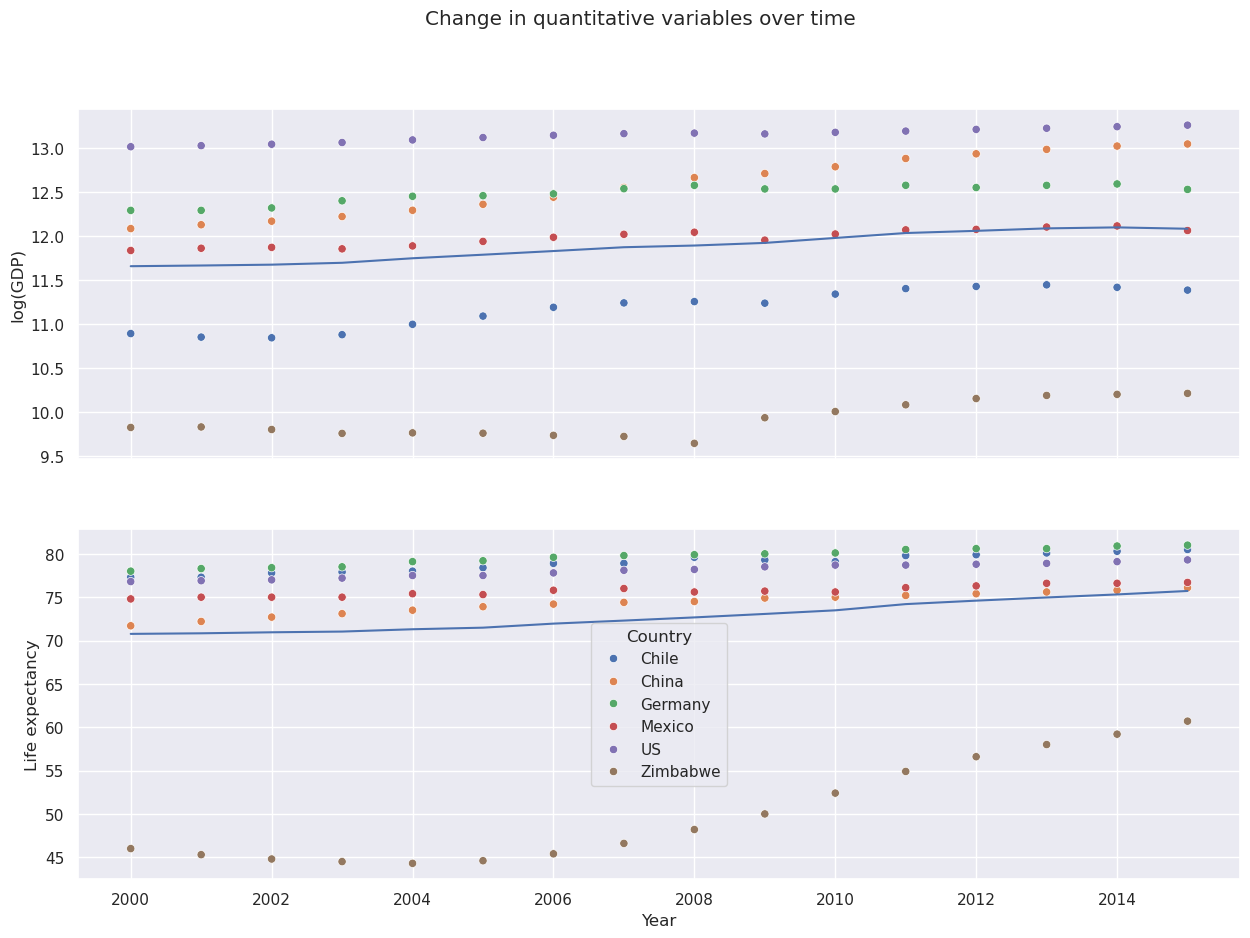

In [20]:
nrows = 2
ncols = 1

fig, ax = plt.subplots(nrows, ncols, figsize=(15,10), sharex=True, sharey=False)

sns.lineplot(data=data[['Year', 'log_GDP']].groupby('Year').mean(), x='Year', y='log_GDP', ax=ax[0])
sns.scatterplot(data=data, x='Year', y='log_GDP', hue='Country', ax=ax[0], legend=False)
sns.lineplot(data=data[['Year', 'LEABY']].groupby('Year').mean(), x='Year', y='LEABY', ax=ax[1])
sns.scatterplot(data=data, x='Year', y='LEABY', hue='Country', ax=ax[1])

fig.suptitle('Change in quantitative variables over time')

ax[0].set_ylabel('log(GDP)')
ax[1].set_ylabel('Life expectancy')

plt.savefig('./figures/dots')
plt.show()

Unsurprisingly, the United States, with China catching up, dominate the other countries in GDP, while the relative stagnation in GDP for countries like Zimbabwe and Chile are evident. We see that the GDP's are distributed more or less over three orders of magnitude, and, at least for Zimbabwe, there is a noticable change in direction of the GDP chart at around the years 2008-2009.

Also, life expectancy is very similar for all countries except Zimbabwe, which despite a significant improvement over the years still lags after the other countries. The improvement also seems to roughly coincide with the change in direction of the GDP at around the years 2008-2009.

#### Post financial crisis in 2008

Here we separate the data points before and after 2008 to see if there is a significant difference in the data points.

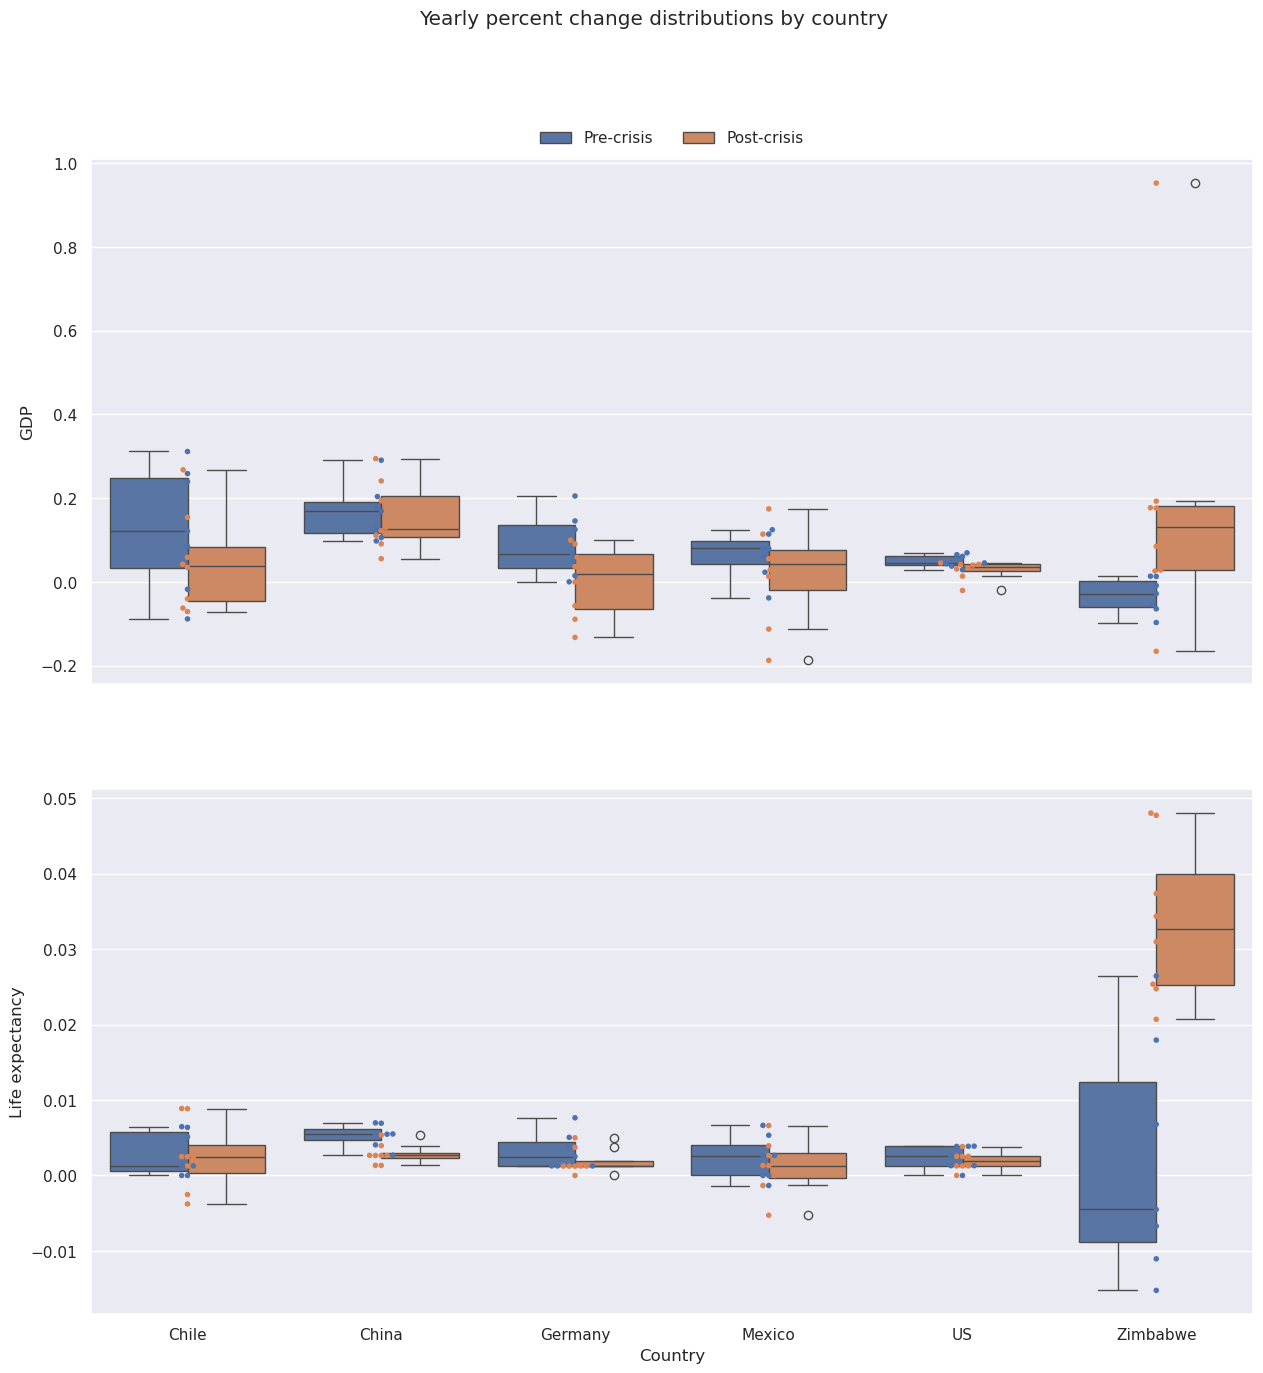

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,15), sharex=True, sharey=False)

data['Era'] = data['Year'].map(lambda x: 'Post-crisis' if x >= 2008 else 'Pre-crisis')

sns.boxplot(data=data.dropna(), y='GDP_pct_ch', x='Country', hue='Era', ax=ax[0])
sns.move_legend(ax[0], 'lower center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
sns.swarmplot(data=data.dropna(), y='GDP_pct_ch', x='Country', hue='Era', size=4, ax=ax[0], legend=False)
sns.boxplot(data=data.dropna(), y='LEABY_pct_ch', x='Country', hue='Era', ax=ax[1], legend=False)
sns.swarmplot(data=data.dropna(), y='LEABY_pct_ch', x='Country', hue='Era', size=4, ax=ax[1], legend=False)

fig.suptitle('Yearly percent change distributions by country')

ax[0].set_ylabel('GDP')
ax[1].set_ylabel('Life expectancy')

plt.savefig('./figures/boxes')
plt.show()

Most countries seem relatively unaffected by the crisis with only minor drops in their drifts in GDP and life expectancy, with Chile experiencing a small increase in the drift for life expectancy after 2008. It is impossible not to notice the shift increase in GDP drift for Zimbabwe and an even bigger increase for life expectancy post-crisis.

#### Correlations

Lastly, we can get an overview of the correlation between GDP and life expectancy. We will use the log of GDP for comparison.

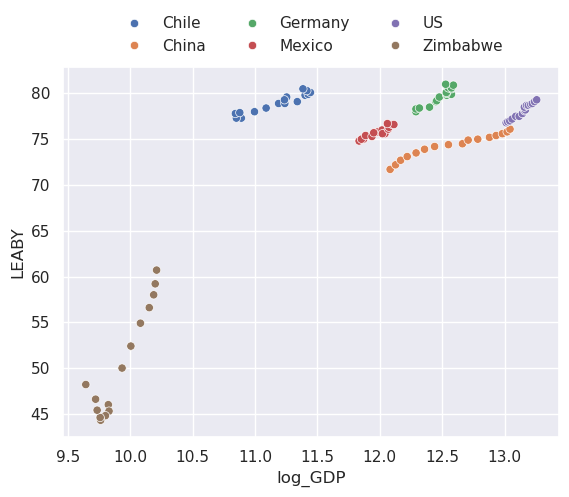

In [22]:
ax = sns.scatterplot(data=data[['log_GDP', 'LEABY', 'Country']], hue='Country', x='log_GDP', y='LEABY')
sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.savefig('./figures/corrs')

This plot suggests that for most countries, there is a positive correlation between the GDP and life expectancy, and again the data for Zimbabwe is less straight forward to interpret.

### Conclusions

#### Key Findings and Takeaways

For this dataset we analyzed the data mostly country by country, instead of considering every single row as a data point of the overall set. Since we essentially divided the dataset into six sets we should be mindful of the fact that there weren't that much data available for each country. Each conclusion should therefore be taken with a grain of salt, however, it is worth considering the few tendencies we did find.

In the first figures we saw that the annual percentage change in both GDP and life expectancy were distributed with varying degrees of variance. For the US, both variables had a small positive drift with little standard deviation, but for Zimbabwe the standard deviation was significant.

In the line plots we then noted that around the year 2008, a significant jump in the values for Zimbabwe appeared and it was conjectured that this was a reflection of the global financial crisis happening at around the same time. The scatterplots also displayed this jump even at a logarithmic scale.

The following box plots plotted the data before and after the year 2008, and these plots laid bare the significant difference in the drifts and quartile ranges of these variables. This difference could then be the subject of a statistical test to determine if this difference is statistically significant. However, more details about the data might be needed in order to select the correct test.

Lastly, we saw that, generally, life expectancy is positively correlated with GDP, with only Zimbabwe having a drop in life expectancy for a certain GDP.

#### Expectations

The different magnitudes of GDP are distributed in an unsurprising manner with the US being the richest and Zimbabwe the poorest. What is a little surprising is that, looking at the box plots, we see that after the crisis most countries have a lower drift than before the crisis, while Zimbabwe has a much higher drift than before the crisis. Again it should be noted that we have relatively few data points so we should be cautious about extracting such conclusions, but this observation could form the basis for further analysis of the effects of the financial crisis on the annual GDP growth for different countries.

#### Skills Obtained from the Process

In the process of completing this project I have primarily improved my skills with matplotlib and seaborn. I have moved away from simply copying and pasting examples and written the code from scratch to make the plots I needed. I have also learned to use these two libraries to make plots that give a quick overview of the data in such a way to inspire the analysis of the data.